## Normalizar la data

- paso necesario antes de hacer cualquier modelos de machine learning
- escalamiento lineal para todas las variables que analicemos.

- tipo de escaladores:
- min-max: cuando la data es uniformemente distribuida
- z-score: en distribuciones normal y simetricas

In [1]:
# 'timeit' sirve para medir la performance de los modelos
# data normalizada trabaja mejor que la no normalizada
import timeit 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-dark")
from sklearn import datasets, linear_model
from sklearn.preprocessing import MinMaxScaler

In [2]:
scaler = MinMaxScaler()
X, y = datasets.load_diabetes(return_X_y = True)
# X (raw): indica el IMC (indice de masa corporal)
# y: medida cuantitativa de la progresion de la enfermedad,
# despues de un año de inicio

raw = X[:, None, 2] #consultar en numpy 'NewAxis' 
raw

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [3]:
# Reglas de Escalamiento
max_raw = max(raw)
min_raw = min(raw)

In [4]:
# los datos ya estan escalados
scaled = (raw - min_raw)/(max_raw - min_raw)

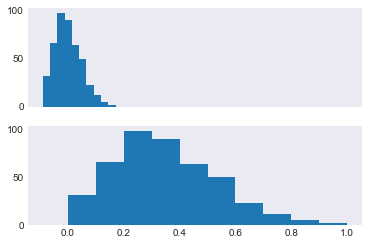

In [5]:
# esto es un arreglo de graficos
# axs es el eje como quiero que se muestren los graficos
# 2 = fila
# 1 = columna
# sharex que comparten el eje x


fig, axs = plt.subplots(2, 1, sharex = True)
axs[0].hist(raw)
axs[1].hist(scaled)
plt.show()

In [6]:
# var 'y' es lo que buscamos predecir
# modelos de entrenamiento:
def train_raw():
    linear_model.LinearRegression().fit(raw, y)
    
def train_scaled():
    # como se muestran los datos cuando estan ajustados
    linear_model.LinearRegression().fit(scaled, y)


In [7]:
# tiempo de ejecucion
raw_time = timeit.timeit(train_raw, number=100)
scaled_time = timeit.timeit(train_scaled, number=100)

print('train raw: {}'.format(raw_time))
print('train scaled: {}'.format(scaled_time))

train raw: 0.062174600000000524
train scaled: 0.035169999999999924


- max-min scalling: es mejor para datos uniformemente distribuidos
- z-score: para datos 

## z - score

In [8]:
# promedio = np.mean()
promedio = raw.mean()

# std
desviacion_estandar = raw.std()

scaled_z = (raw - promedio)/desviacion_estandar 

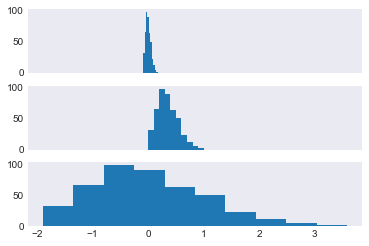

In [9]:
fig, axs = plt.subplots(3, 1, sharex = True)
axs[0].hist(raw) # data sin escalar
axs[1].hist(scaled) # max-min
axs[2].hist(scaled_z) # z-score
plt.show()

In [10]:
def train_scaled_z():
    linear_model.LinearRegression().fit(scaled_z, y)

In [11]:
scaled_z_time = timeit.timeit(train_scaled_z, number=100)

In [12]:
print('train raw: {}'.format(raw_time))
print('train scaled: {}'.format(scaled_time))
print('train scaled_z: {}'.format(scaled_z_time))

train raw: 0.062174600000000524
train scaled: 0.035169999999999924
train scaled_z: 0.034678500000000057


## Transformacion para distribuciones no lineales
Se transforma a una normal y luego se aplica alguna de las transformaciones vistas

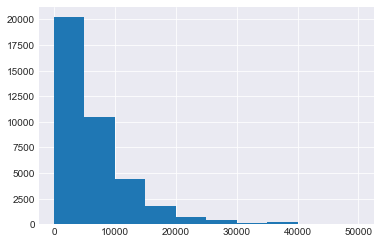

In [13]:
df = pd.read_csv('cars.csv')
df.price_usd.hist()
plt.show()

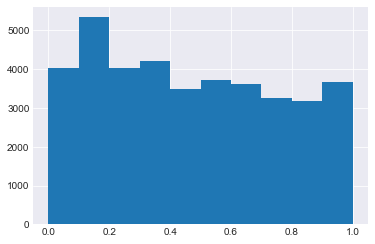

In [14]:
# transformacion con la tangente hiperbolica tanh(x)
p = 10000
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()
plt.show()